# AIR QUALITY IN MADRID

Note: If viewing in Github, use nbviewer to view the file to load plotly images

***

## Introduction

#### Air Pollution and Madrid
Air pollution is an increasing threat to big cities as it directly impacts people's health and even leads to environmental degradation. Many cities and nations have been seen imposing traffic restrictions and policies on smoke emitting factories to combat pollution.

Madrid being of the major metropolitian city in the world has expressed sever concerns and traffic restrictions due to increasing pollutants, mostly NO2, O3 and PM2.5 particles. __[Source-ThomasReuters](https://www.reuters.com/article/us-spain-madrid-cars/madrid-restricts-traffic-in-city-center-to-clean-up-air-pollution-idUSKCN1NZ2AU)__ __[Source-BBC](https://www.bbc.com/news/world-europe-46403397)__
 ![AirQualityMadrid.jpg](Madrid Air Quality problems.jpg)
__[ImageSource-ElPais](https://elpais.com/elpais/2018/12/05/inenglish/1544008632_514634.html)__

#### Air Quality Index
Air Quality Index (AQI) is a scale used by government to communicate to people how polluted air is or is forecasted to be. The image below shoes the AQI scale and the real time AQI rating of Madrid's various air purifying stations can be viewed __[here.](https://aqicn.org/map/madrid/#@g/40.4086/-3.6411/12z)__

![AQI.jpg](AQI.jpg)

#### Objective
The goal of this notebook is the explore the major air pollutants in Madrid's air and in each air purifying stations. Furthermore, an LSTM-RNN model is used to predict Madrid's major air pollutant for next two years.







## Dataset

__[This](https://www.kaggle.com/decide-soluciones/air-quality-madrid#madrid.h5)__ dataset is used for the exploratory analysis of Air Quality in Madrid. The data consists of two different datasets.
1. Stations: Consists of station id, address, names, longitude and latitude information
2. Madrid Air 2001-2018: Consists of 18 years of data for madrid's air including date, station id and amount of pollutants per hour masured in μg/m3 (Micrograms per Cubic Meter of Air). Not every station has the same equipment, therefore each station can measure only a certain subset of particles.

#### Loading Libraries

We will utilise numpy, pandas to manipulate data; pandas, seaborn, matplotlib and plotly to visulaise data, missingno to detect missing data and finally Tensorflow to build a predictive model.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import missingno as msno

Let's load and explore the stations dataset first.

In [6]:
stations = pd.read_csv("./data/stations.csv")

In [7]:
stations

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604
5,28079018,Farolillo,Calle Farolillo - C/Ervigio,-3.731853,40.394781,630
6,28079024,Casa de Campo,Casa de Campo (Terminal del Teleférico),-3.747347,40.419356,642
7,28079027,Barajas Pueblo,"C/. Júpiter, 21 (Barajas)",-3.580031,40.476928,621
8,28079035,Pza. del Carmen,Plaza del Carmen esq. Tres Cruces.,-3.703172,40.419208,659
9,28079036,Moratalaz,Avd. Moratalaz esq. Camino de los Vinateros,-3.645306,40.407947,685


There are 23 stations available with latitude and longitude profiles. We can use that to map the stations.

It can be seen that stations are evenly distributed through Madrid.

In [8]:
mapbox_access_token = 'pk.eyJ1IjoiaGFyc2h1bDA5OSIsImEiOiJjanJhaWhwaDIwczcyNDNwbmQwZm85bTA4In0.pNFTNhmIG4E8QZlVonYtmg'

data = [
    go.Scattermapbox(
        lat=stations.lat,
        lon=stations.lon,
        mode='markers',
        marker=dict(
            size=14
        ),
        text=stations.name,
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=40.42,
            lon=-3.7
        ),
        pitch=0,
        zoom=10
    ),
    title = "Air Purifying stations, Madrid"
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='Madrid Air Pur')

We can now load Madrid's air data from 2000-2018. Since we have 18 different dataset for that, I concatenated it into one big dataset and named it "df". This dataframe can now be used to explore the dataset.

Firstly, let's see what the columns look like.

In [9]:
madrid_air_2001 = pd.read_csv('data/csvs_per_year/madrid_2001.csv')
madrid_air_2002 = pd.read_csv('data/csvs_per_year/madrid_2002.csv')
madrid_air_2003 = pd.read_csv('data/csvs_per_year/madrid_2003.csv')
madrid_air_2004 = pd.read_csv('data/csvs_per_year/madrid_2004.csv')
madrid_air_2005 = pd.read_csv('data/csvs_per_year/madrid_2005.csv')
madrid_air_2006 = pd.read_csv('data/csvs_per_year/madrid_2006.csv')
madrid_air_2007 = pd.read_csv('data/csvs_per_year/madrid_2007.csv')
madrid_air_2008 = pd.read_csv('data/csvs_per_year/madrid_2008.csv')
madrid_air_2009 = pd.read_csv('data/csvs_per_year/madrid_2009.csv')
madrid_air_2010 = pd.read_csv('data/csvs_per_year/madrid_2010.csv')
madrid_air_2011 = pd.read_csv('data/csvs_per_year/madrid_2011.csv')
madrid_air_2012 = pd.read_csv('data/csvs_per_year/madrid_2012.csv')
madrid_air_2013 = pd.read_csv('data/csvs_per_year/madrid_2013.csv')
madrid_air_2014 = pd.read_csv('data/csvs_per_year/madrid_2014.csv')
madrid_air_2015 = pd.read_csv('data/csvs_per_year/madrid_2015.csv')
madrid_air_2016 = pd.read_csv('data/csvs_per_year/madrid_2016.csv')
madrid_air_2017 = pd.read_csv('data/csvs_per_year/madrid_2017.csv')
madrid_air_2018 = pd.read_csv('data/csvs_per_year/madrid_2018.csv')

In [23]:
madrid_air =  [madrid_air_2001, madrid_air_2002, madrid_air_2003, madrid_air_2004, madrid_air_2005, madrid_air_2006, madrid_air_2007, madrid_air_2008, madrid_air_2009, madrid_air_2010, madrid_air_2011, madrid_air_2012, madrid_air_2013, madrid_air_2014, madrid_air_2015, madrid_air_2016, madrid_air_2017, madrid_air_2018,]
df = pd.concat(madrid_air, sort=True) #to automatically sort when axis is not aligned

In [24]:
df.head()

,BEN,CH4,CO,EBE,MXY,NMHC,NO,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,date,station
0,NaN,NaN,0.37,NaN,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,NaN,6.34,NaN,NaN,2001-08-01 01:00:00,28079001
1,1.5,NaN,0.34,1.49,4.1,0.07,NaN,56.250000,75.169998,2.11,42.160000,100.599998,NaN,1.73,8.11,1.24,10.82,2001-08-01 01:00:00,28079035
2,NaN,NaN,0.28,NaN,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,NaN,7.85,NaN,NaN,2001-08-01 01:00:00,28079003
3,NaN,NaN,0.47,NaN,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,NaN,6.46,NaN,NaN,2001-08-01 01:00:00,28079004
4,NaN,NaN,0.39,NaN,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,NaN,8.80,NaN,NaN,2001-08-01 01:00:00,28079039


In [25]:
df.describe()

,BEN,CH4,CO,EBE,MXY,NMHC,NO,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
count,1.041684e+06,14850.000000,2.651012e+06,1.001724e+06,315415.000000,1.085312e+06,1.532397e+06,3.787050e+06,2.376275e+06,315695.000000,2.991732e+06,2.861255e+06,816424.000000,315584.000000,2.775960e+06,1.086441e+06,1.038929e+06,3.808224e+06
mean,1.257431e+00,1.300849,5.503838e-01,1.407927e+00,4.650394,1.873865e-01,2.343886e+01,5.047151e+01,1.093188e+02,2.280912,3.982616e+01,2.893654e+01,13.738292,2.056178,1.065539e+01,1.435882e+00,5.876842e+00,2.807903e+07
std,1.910831e+00,0.195550,5.354483e-01,2.146109e+00,5.599223,1.539529e-01,5.021504e+01,3.455288e+01,1.102871e+02,2.639609,3.039249e+01,2.594859e+01,11.214146,2.395130,9.121267e+00,2.332228e-01,8.524460e+00,2.028574e+01
min,0.000000e+00,0.020000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-31.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.807900e+07
25%,2.100000e-01,1.170000,2.600000e-01,3.500000e-01,1.200000,9.000000e-02,2.000000e+00,2.400000e+01,4.000000e+01,0.960000,1.271000e+01,1.150000e+01,6.450000,0.800000,5.840000e+00,1.300000e+00,1.100000e+00,2.807901e+07
50%,6.000000e-01,1.250000,4.000000e-01,8.800000e-01,2.800000,1.500000e-01,6.000000e+00,4.400000e+01,7.615000e+01,1.320000,3.486000e+01,2.149000e+01,11.000000,1.280000,8.150000e+00,1.380000e+00,3.160000e+00,2.807902e+07
75%,1.500000e+00,1.400000,6.500000e-01,1.580000e+00,5.890000,2.400000e-01,2.000000e+01,6.958000e+01,1.397000e+02,2.740000,5.999000e+01,3.775000e+01,17.670000,2.510000,1.230000e+01,1.510000e+00,6.990000e+00,2.807904e+07
max,6.639000e+01,3.920000,1.804000e+01,1.622000e+02,177.600006,9.070000e+00,1.146000e+03,6.286000e+02,2.537000e+03,103.000000,2.360000e+02,6.950000e+02,506.899994,106.000000,1.991000e+02,1.048000e+01,2.429000e+02,2.807910e+07


The dataframe consists of 17 pollutants. Since we are mainly concerened with major air pollutants that are dangerous to humans and environment, we will keep the following pollutants:

1) Carbon Monoxide - CO reduces oxygen in the blood stream, when it enters the body through the lungs. The danger of this pollutant increases in people who suffer cardiovascular diseases such as angina.

2) Nitrous Dioxide -  it has a direct effect on health, as short-term exposure reduces lung function while long term exposure is linked to increased risk of respiratory infection in children. NOx levels in urban areas are influenced by weather episodes, which accounts for some of the variation seen in annual results.

3) Ozone - exposure to this can irritate breathing, decrease lung function, inflame airways and worsen lung conditions such as asthma. It can also affect crops and other vegetation and even buildings. 

4) Sulphur Dioxide - high concentrations can result in breathing impairment for asthmatics who are active outdoors. As can be seen from the graph below, levels have been consistently low in Ireland since 2002, with a slight downward trend. This trend is reflective in the shift in fuel choice across Ireland in both the residential heating sector and the energy production sector. This shift has been from sulphur containing bituminous coal to those fuels which are low in SO2 production, such as natural gas (EPA, 2013).

5) PM10 particles and PM2.5 particles - These particulates are so small that they get deep into your respiratory tract and increase the risk of disorders.

__[Source](http://www.askaboutireland.ie/enfo/irelands-environment/air-quality/which-pollutants-are-dang/)__



In [26]:
df.date = pd.to_datetime(df.date)
df = df.drop(['BEN','CH4','EBE','MXY','NMHC','NO','NOx','OXY','PXY','TCH','TOL'],axis=1)

After removing rest of the pollutants from the dataframe, the date is converted to pandas datetime format to further manipulate it for vizualisations and predicting.
Further, I used missigno to form a matrix for the available data. As we can see below, PM2.5 has a lot of missing data. Although PM2.5 is one of the most important factor in lung diseases; one option is to interpolate the missing data to complete the column but since it seems that more data is unavailable than being present, we should skip PM2.5 in this study as it will only lead to data inaccuracy.

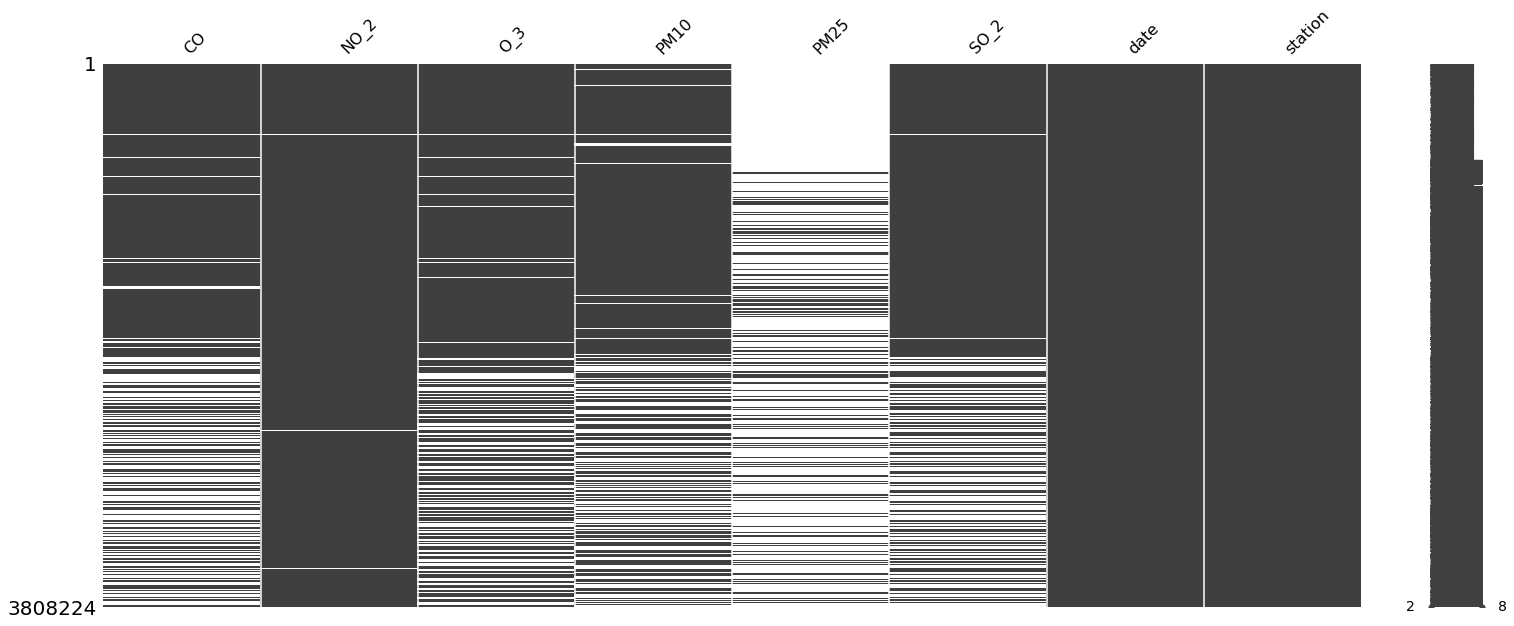

In [27]:
msno.matrix(df)

In [28]:
df = df.drop(['PM25'],axis=1)

 Our dataset is now ready to generate insights.

## Data Analysis

To analyse the data we will start by visualising amount of air pollutants in each station. Since not every station has all the equipments to purify these pollutants, this plot can help identify if any increase in equipments is needed for specific pollutants

Text(0, 0.5, 'μg/m3')

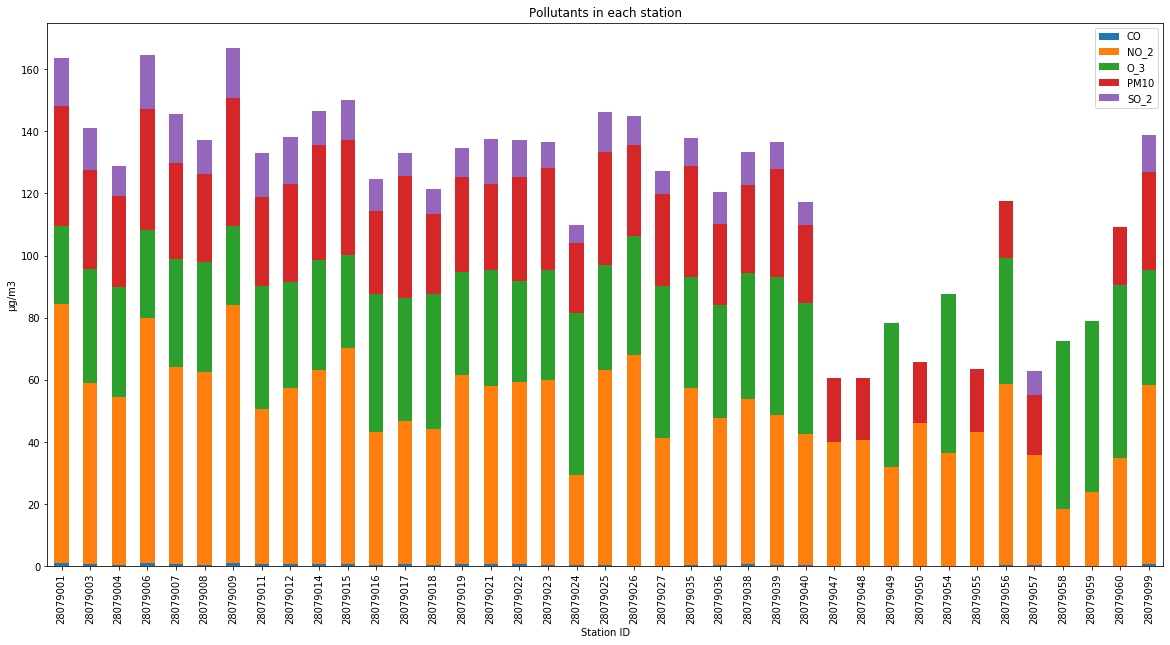

In [29]:
stationsum = df.groupby(['station']).mean()
ax = stationsum.plot(kind='bar', stacked=True, title = 'Pollutants in each station',figsize =(20,10))
ax.set_xlabel("Station ID")
ax.set_ylabel("μg/m3")

It seems Nitrous Dioxide and Ozone are the major pollutants in most of the stations. In addition to that, station ID 28079009 seems to have the most pollution. Possible reasons can be that it is located in traffic heavy areas or the equipments to treat air aren't functioning properly.

Next we will visualise the mean pollution on yearly, monthly and hourly basis. Since, we do not require the station column now, we can drop it.

In [30]:
df

,CO,NO_2,O_3,PM10,SO_2,date,station
0,0.37,58.400002,34.529999,105.000000,6.34,2001-08-01 01:00:00,28079001
1,0.34,56.250000,42.160000,100.599998,8.11,2001-08-01 01:00:00,28079035
2,0.28,50.660000,46.310001,100.099998,7.85,2001-08-01 01:00:00,28079003
3,0.47,69.790001,40.650002,69.779999,6.46,2001-08-01 01:00:00,28079004
4,0.39,22.830000,66.309998,75.180000,8.80,2001-08-01 01:00:00,28079039
5,0.63,66.260002,33.500000,122.699997,6.36,2001-08-01 01:00:00,28079006
6,0.28,35.799999,68.250000,124.900002,5.23,2001-08-01 01:00:00,28079007
7,0.67,74.830002,26.410000,113.000000,11.61,2001-08-01 01:00:00,28079009
8,0.41,33.209999,62.299999,125.300003,10.87,2001-08-01 01:00:00,28079038
9,0.17,24.129999,46.200001,95.589996,3.89,2001-08-01 01:00:00,28079011


In [31]:
df = df.drop(['station'],axis=1)

The plot below shows that while the mean pollution has decreased since 2000, thanks to stricter governemental policies and more awareness regarding pollutants emitted from cars and factories, they are still relatively high. One __[article](https://www.transportenvironment.org/news/air-pollution-rise-spain)__ suggests that rise in Ozone since 2008 might be due the economic dowturn of 2008. The final goal of the notebook will be to create a model to predict amount of one of the pollutants for next two years, therefore this plot will be useful later as well.

Text(0, 0.5, 'μg/m3')

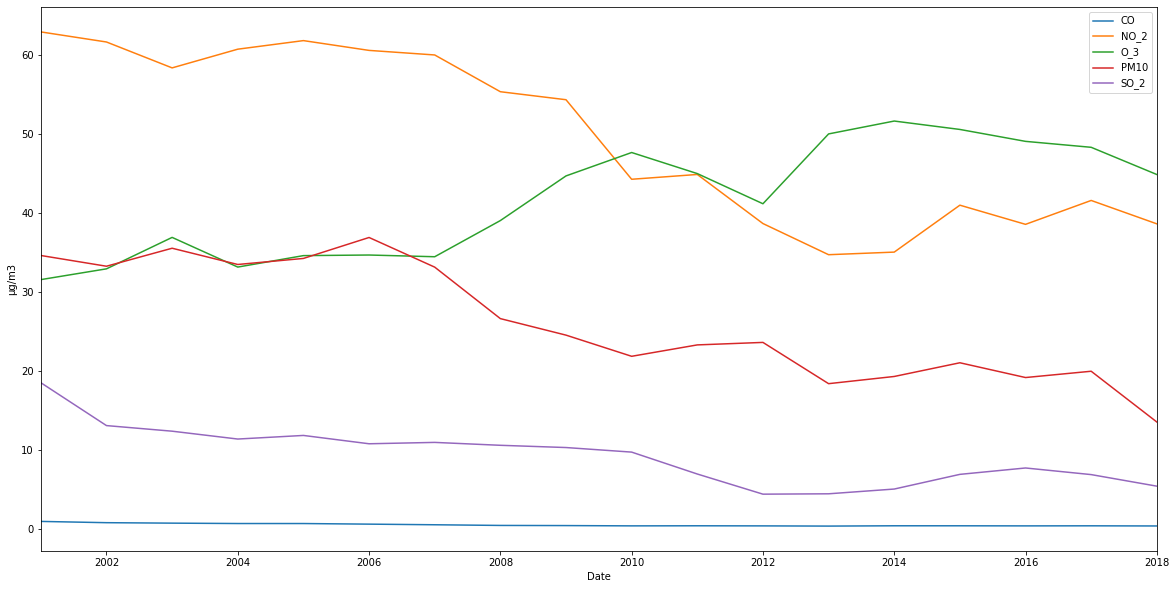

In [32]:
yr = df.groupby(df['date'].dt.year).mean()
ax = yr.plot(figsize =(20,10))
ax.set_xlabel("Date")
ax.set_ylabel("μg/m3")

Next we can plot the daily mean of the amount of pollutants on a month to month basis. It can be observed that there is a rise in Ozone during the summer months, while other pollutants tend to rise during the winter months. This is in line with studies that show that the reactions that create ozone are catalysed by heat and sunlight.

Text(0, 0.5, 'μg/m3')

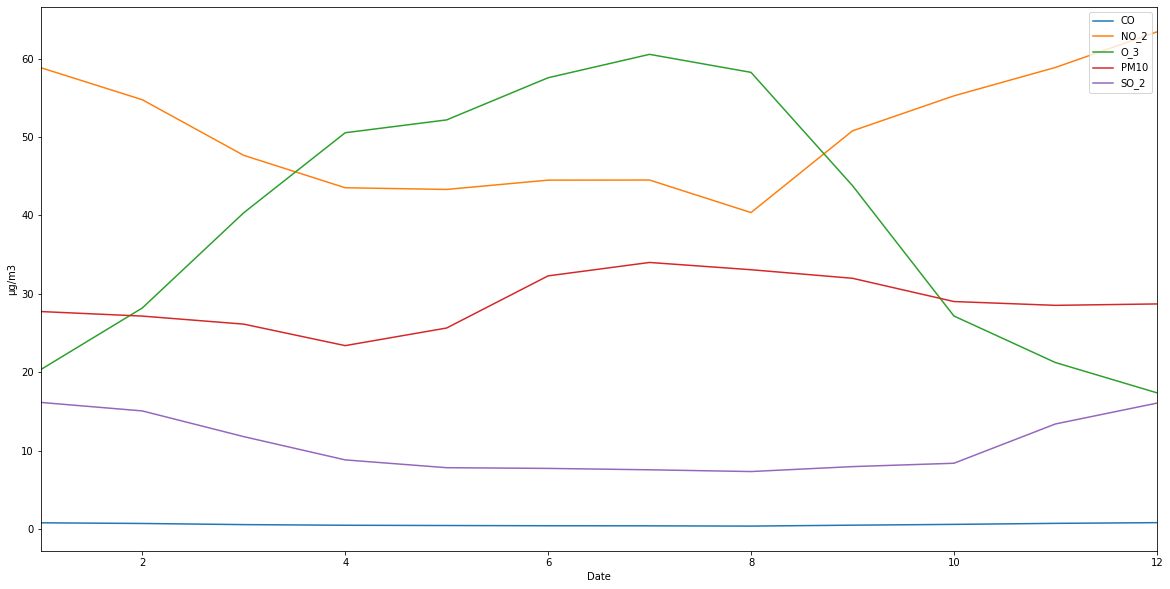

In [33]:
mt = df.groupby(df['date'].dt.month).mean()
ax = mt.plot(figsize =(20,10))
ax.set_xlabel("Date")
ax.set_ylabel("μg/m3")

Finally, we plot the hourly mean to visulaise the times the air is most polluted. Nitrous Dioxide and PM10 particles seem to be high during early morning and late night. While Ozone amount rises around 1600 hours. A general trend that can be noticed is pollution levels rise after noon and progress to higher amounts by the end of the day.

Text(0, 0.5, 'μg/m3')

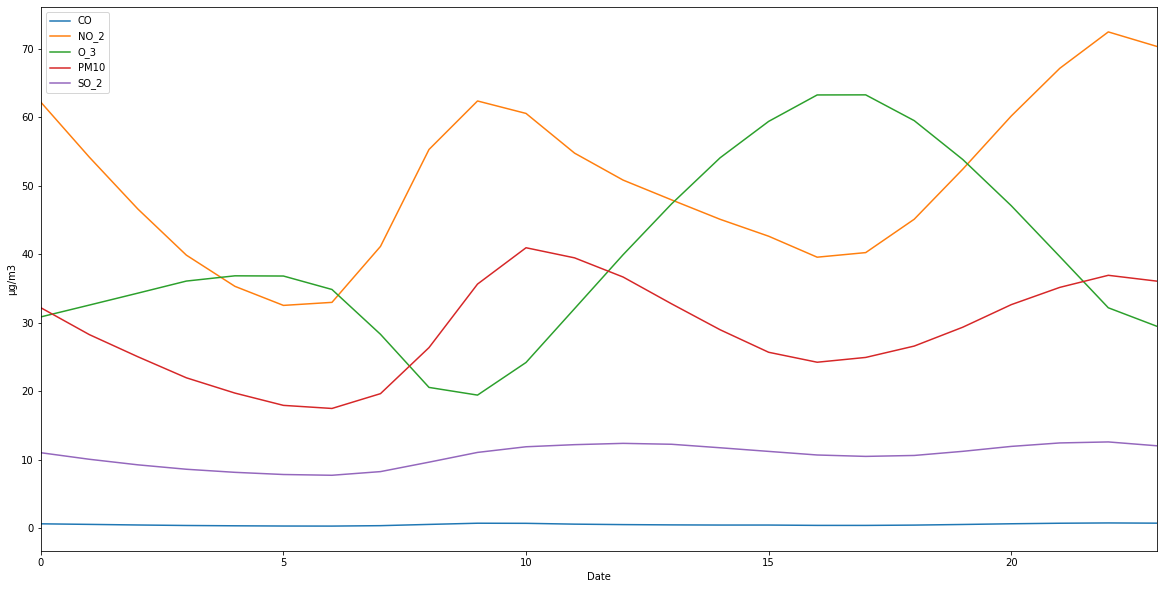

In [34]:
hour = df.groupby(df['date'].dt.hour).mean()
ax = hour.plot(figsize =(20,10))
ax.set_xlabel("Date")
ax.set_ylabel("μg/m3")

## Prediction

Using the dataset and trends we analysed from the data, we will now use a Recurrent Neural Network and Long Short Term Memory cells to generate a model to predict pollutants for next two years.

In order to use LSTM-RNN the dataframe will first be shifted to create features and target variables. Then a sequence will be generated to be used as input in the Neural Network.

Firstly, the dataframe is grouped by date and the mean value of the amount of pollutant is used for each row in the columns. The data before 2015 is used as training dataset named df_train and the data after including 2015 and before 2018 will be used as a validation or testing dataset.

In [35]:
df = df.groupby(df['date'].dt.date).mean()

In [36]:
df.head()

,CO,NO_2,O_3,PM10,SO_2
date,,,,,
2001-01-01,0.998400,47.760278,22.275357,19.367887,18.896400
2001-01-02,0.713709,45.141650,36.652239,17.426450,16.859624
2001-01-03,0.871186,53.401426,23.558798,24.811873,18.297260
2001-01-04,0.848846,50.055048,25.265474,25.086376,17.920690
2001-01-05,1.197067,51.629295,11.781987,26.796617,18.446490


In [37]:
df['date'] = pd.to_datetime(df.index)

In [38]:
df_train = df[df['date'].dt.year < 2015]
df_test = df[(df['date'].dt.year >= 2015) & (df['date'].dt.year <2017)]

In [39]:
df_train.head()

,CO,NO_2,O_3,PM10,SO_2,date
date,,,,,,
2001-01-01,0.998400,47.760278,22.275357,19.367887,18.896400,2001-01-01
2001-01-02,0.713709,45.141650,36.652239,17.426450,16.859624,2001-01-02
2001-01-03,0.871186,53.401426,23.558798,24.811873,18.297260,2001-01-03
2001-01-04,0.848846,50.055048,25.265474,25.086376,17.920690,2001-01-04
2001-01-05,1.197067,51.629295,11.781987,26.796617,18.446490,2001-01-05


In [40]:
df_train = df_train.drop(['date'],axis=1)
df_test = df_test.drop(['date'],axis=1)

In [41]:
df_train.tail()

,CO,NO_2,O_3,PM10,SO_2
date,,,,,
2014-12-27,0.500417,51.430556,12.565476,20.555556,8.166667
2014-12-28,0.255417,19.449653,61.360119,16.802083,5.912500
2014-12-29,0.324583,33.303819,52.779762,10.951389,9.200000
2014-12-30,0.617083,85.339130,13.583333,24.276596,11.825000
2014-12-31,0.823750,93.291667,6.827381,34.031359,13.395833


Next the data is normalized using the MinMaxScaler from sckit-learn library. The scaler is fitted on the training set and used to normalize test set.

In [42]:
scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)
df_test = scaler.transform(df_test)
df_train = pd.DataFrame(df_train)
df_train.index = pd.date_range(start = "2001-01-01",periods=len(df_train),freq = 'D')
df_test = pd.DataFrame(df_test)
df_test.index = pd.date_range(start = "2015-01-01",periods=len(df_test),freq = 'D')

Training and testing data is then converted to sequences in a window of 10 days. This is a necessary step for LSTM to learn the patterns in the time series.

In [43]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences.values[i:end_ix, :], sequences.values[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [44]:
x_train,y_train = split_sequences(df_train,5)

In [45]:
x_test,y_test = split_sequences(df_test,5)

Finally, an LSTM-RNN model is constructed and fine tuned to avoid overfitting and underfitting.

In [46]:
model = Sequential()
model.add(LSTM(units = 16, input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

model.add(Dense(5))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs = 100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 5108 samples, validate on 726 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5108/5108 [==============================] - 1s 264us/sample - loss: 0.0300 - val_loss: 0.0091
Epoch 2/100
5108/5108 [==============================] - 1s 122us/sample - loss: 0.0117 - val_loss: 0.0070
Epoch 3/100
5108/5108 [==============================] - 1s 122us/sample - loss: 0.0100 - val_loss: 0.0065
Epoch 4/100
5108/5108 [==============================] - 1s 125us/sample - loss: 0.0094 - val_loss: 0.0062
Epoch 5/100
5108/5108 [==============================] - 1s 122us/sample - loss: 0.0087 - val_loss: 0.0061
Epoch 6/100
5108/5108 [==============================] - 1s 126us/sample - loss: 0.0083 - val_loss: 0.0059
Epoch 7/100
5108/5108 [=====

Epoch 65/100
5108/5108 [==============================] - 1s 127us/sample - loss: 0.0058 - val_loss: 0.0050
Epoch 66/100
5108/5108 [==============================] - 1s 128us/sample - loss: 0.0057 - val_loss: 0.0052
Epoch 67/100
5108/5108 [==============================] - 1s 130us/sample - loss: 0.0058 - val_loss: 0.0049
Epoch 68/100
5108/5108 [==============================] - 1s 125us/sample - loss: 0.0057 - val_loss: 0.0048
Epoch 69/100
5108/5108 [==============================] - 1s 118us/sample - loss: 0.0058 - val_loss: 0.0049
Epoch 70/100
5108/5108 [==============================] - 1s 122us/sample - loss: 0.0057 - val_loss: 0.0048
Epoch 71/100
5108/5108 [==============================] - 1s 117us/sample - loss: 0.0057 - val_loss: 0.0049
Epoch 72/100
5108/5108 [==============================] - 1s 124us/sample - loss: 0.0056 - val_loss: 0.0050
Epoch 73/100
5108/5108 [==============================] - 1s 123us/sample - loss: 0.0058 - val_loss: 0.0048
Epoch 74/100
5108/5108 [====

We can now plot out model loss.

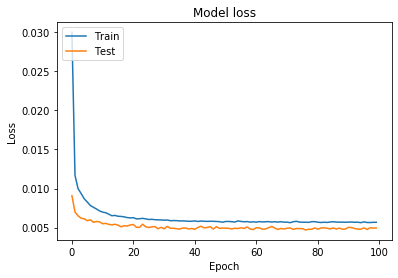

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Predictions using the test set are generate:

In [48]:
predictions = model.predict(x_test)

We can now assess the performance of the model by plotting the real values from the y_test set and predictions genereted using our model and x_test. For that, I first constructed a dataframe consisting of real and predicted values from 2015-2017. And then plotted the dataframe, specifically comparing Ozone prediciton since it is the major pollutant in Madrid

In [49]:
predictions.mean()

0.19529328

In [50]:
y_test.mean()

0.18976095907382715

In [51]:
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

In [52]:
realval = pd.DataFrame(y_test)
realval['date'] = pd.date_range(start = "2015-01-01",periods=len(realval),freq = 'D')
realval = realval.set_index('date')
realval.columns = ['real CO', 'real NO2', 'real O3','real PM10','real SO2']
preds = pd.DataFrame(predictions)
preds['date'] = pd.date_range(start = "2015-01-01",periods=len(preds),freq = 'D')
preds = preds.set_index('date')
preds.columns = ['pred CO', 'pred NO2', 'pred O3','pred PM10','pred SO2']

In [53]:
merged = pd.merge(realval,
                 preds[['pred CO', 'pred NO2', 'pred O3','pred PM10','pred SO2']],
                 on='date')

Text(0, 0.5, 'ug/m3')

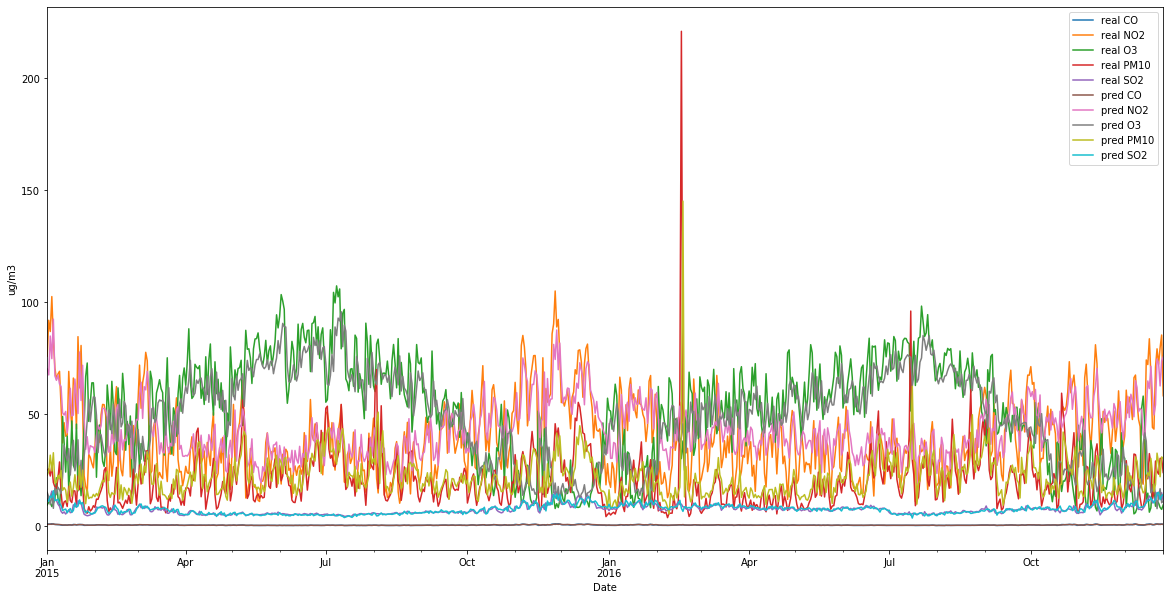

In [54]:
ax = merged.plot(kind = 'line',figsize =(20,10))
ax.set_xlabel("Date")
ax.set_ylabel("ug/m3")

Althouhg our predictions seem good, there are a few outliers, which can be removed by interpolating the data, especially in the case of PM10 particles.

In order to see how our model predicted, I isolated Ozone for 2015-2017 and compared it's predicted and real values in the following plot. The predictions seem to be fairly accurate and the model should perform better with some tuning

In [55]:
ozone = pd.DataFrame(merged.drop(['pred CO', 'pred NO2','pred PM10','pred SO2','real CO', 'real NO2','real PM10','real SO2'],axis=1))

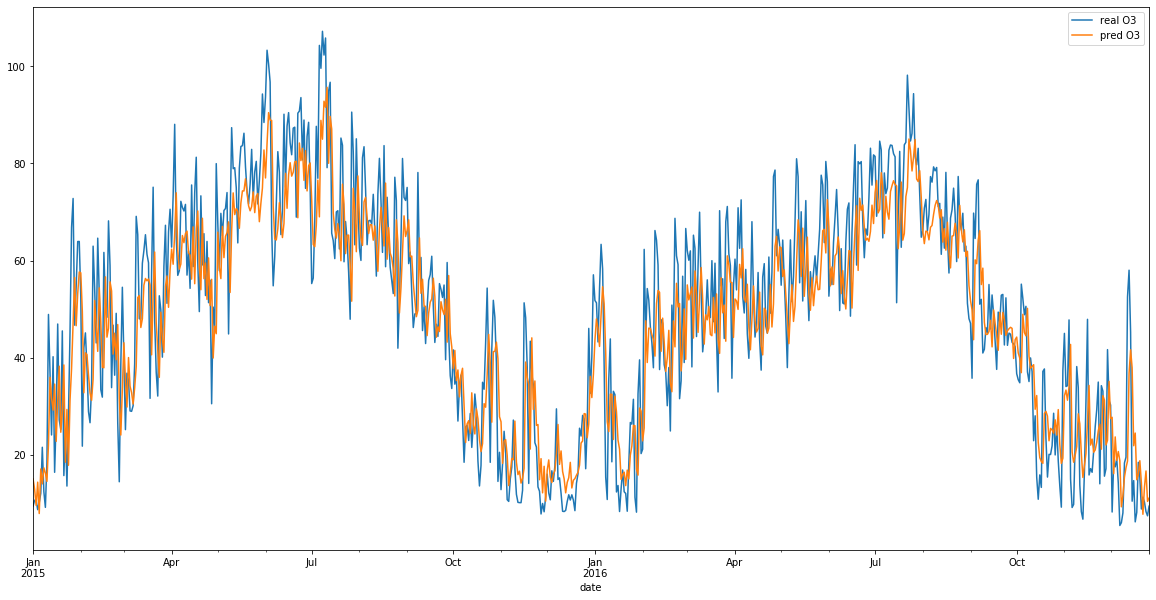

In [56]:
ozone.plot(kind = 'line',figsize =(20,10))

## Future Improvements

Some of the future changes we would like to implement to create a robust model for prediction and to generate better insights are:

1) Add an elevation column to Madrid's Air purifying stations in order to determine how altitude affects amount of air pollutants

2) Use Madrid's traffic and weather datasets along with the amount of air pollutants in order to construct a more robust model in forecasting pollution. Since traffic and weather play a major role in the amounts of pollutants.

3) Use ARIMA algorithm to predict weather and compare it to LSTM-RNN

4) Better Data Preparatioin - remove outliers